In [ ]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [16]:
def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.01, rclip=1, credibility=80) 


def openai_spend_on_largest_model_this_year(total_investment,
                                            percent_investment_spent_this_year,
                                            percent_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(total_investment * percent_investment_spent_this_year * percent_spend_on_compute * percent_compute_on_biggest_model,
                      fn=np.log10)


gpt3_prediction = openai_spend_on_largest_model_this_year(total_investment=1*B,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_spend_on_compute=pct_dist(0.2, 0.8),
                                                          percent_compute_on_biggest_model=pct_dist(0.05, 0.15))


samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 2.4*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('{}%'.format(round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))

{1: '427 thousand',
 5: '848 thousand',
 10: '1 million',
 20: '2 million',
 30: '3 million',
 40: '3 million',
 50: '4 million',
 60: '5 million',
 70: '7 million',
 80: '10 million',
 90: '15 million',
 95: '20 million',
 99: '39 million'}
-
27.9%


In [17]:
largest_openai_model_2023_prediction = openai_spend_on_largest_model_this_year(total_investment=10*B,
                                                                               percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                               percent_spend_on_compute=pct_dist(0.2, 0.9),
                                                                               percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_openai_model_2023_prediction @ (100*K)

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '4 million',
 5: '9 million',
 10: '14 million',
 20: '23 million',
 30: '33 million',
 40: '44 million',
 50: '59 million',
 60: '78 million',
 70: '106 million',
 80: '150 million',
 90: '244 million',
 95: '361 million',
 99: '729 million'}


In [26]:
def google_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                            percent_r_and_d_on_ai,
                                            percent_ai_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)


largest_google_model_2023_prediction = google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.norm(22*B, 40*B, credibility=80),
                                                                               percent_r_and_d_on_ai=pct_dist(0.05, 0.5),
                                                                               percent_ai_spend_on_compute=pct_dist(0.2, 0.9),
                                                                               percent_compute_on_biggest_model=pct_dist(0.01, 0.1))
samples = largest_google_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '3 million',
 5: '7 million',
 10: '11 million',
 20: '21 million',
 30: '31 million',
 40: '45 million',
 50: '64 million',
 60: '91 million',
 70: '132 million',
 80: '204 million',
 90: '373 million',
 95: '615 million',
 99: '2 billion'}


In [44]:
sq.dist_max(largest_openai_model_2023_prediction, largest_google_model_2023_prediction) @ 10

array([8.31888558, 7.75006254, 8.4252373 , 8.25794064, 8.29410084,
       8.77465706, 7.40022856, 8.55412613, 7.88487481, 7.47409532])

In [45]:
mixed_model = sq.dist_max(largest_openai_model_2023_prediction, largest_google_model_2023_prediction)
mixed_model @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

RecursionError: maximum recursion depth exceeded in comparison

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 7.108155985566396,
 5: 7.381324215598414,
 10: 7.5307228636822945,
 20: 7.71348114719872,
 30: 7.848867736551558,
 40: 7.971305750633925,
 50: 8.085682840378745,
 60: 8.196533767988056,
 70: 8.318547150620388,
 80: 8.466329208022353,
 90: 8.680978709736927,
 95: 8.854234142359445,
 99: 9.20405930408508}


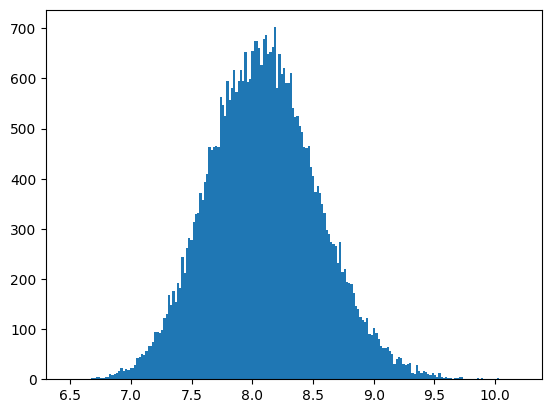

In [46]:
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

In [47]:
sq.get_percentiles(sq.norm(7.38, 8.85) @ 100000)

{1: 7.083937297667176,
 5: 7.388103273558428,
 10: 7.547878569724751,
 20: 7.743677722519442,
 30: 7.885271572065818,
 40: 8.006205518989102,
 50: 8.118372011029306,
 60: 8.231382308212375,
 70: 8.352473721141202,
 80: 8.49186332153726,
 90: 8.685324279131427,
 95: 8.85006473323121,
 99: 9.148390462980618}